# <b> Modelo de árbol de decisión y logistica

   
**Fuentes para el AC:** <br> [Caso Estudio N°1](https://docs.google.com/document/d/1ox7lQjpZkmhQCbwEHBXTSVO7M-hNkq0ulFgALy6Mvyw/edit?usp=sharing) <br> [dataset](https://drive.google.com/file/d/1nrKbIYKSOmP1o7_oQMiaFoJFeEYUUcHg/view?usp=sharing)


In [119]:
import warnings
warnings.filterwarnings("ignore")

# manejo de data
import pandas as pd
pd.options.display.max_columns = 100
pd.options.display.float_format = '{:.3f}'.format

# visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns


## Data

Para simplicidad en la consulta, se proporciona diccionario de descripciones de campos.

In [120]:
d_desc = {'age':'Edad del cliente o de la persona.','job':'Tipo de trabajo del cliente o persona.',
          'marital':'Estado civil del cliente o persona.','education':'Nivel educativo del cliente o persona.',
          'default':'Tiene un crédito en mora el cliente o persona.? ','housing':'Tiene un crédito hipotecario el cliente o persona.?',
          'loan':'Tiene un crédito personal el cliente o persona.? ','contact':'Tipo de canal de comunicación para contactarlo? ',
          'month':'Ultimo mes de contacto?','day_of_week':'Ultimo dia de la semana de contacto? ',
          'duration':'Duración de la llamada o del contacto.','campaign':'Número de contactos para el ofrecimiento de la actual campaña. ',
          'pdays':'Número de días que pasan desde la última gestión en campañas. ','previous':'Número de contactos para el ofrecimiento antes de la actual campaña. ',
          'poutcome':'Ultima tipificación de aceptación en campaña.','emp.var.rate':'Tasa de variación del empleo. ',
          'cons.price.idx':'Indice de precios al consumidor.','cons.conf.idx':'Indice de confianza al consumidor.',
          'euribor3m':'Ratio de tipo de cambio medio en los últimos 3 meses. ','nr.employed':'Número de empleados.',
            'y':'¿El cliente se ha suscrito al producto financiero?'}

Cargamos el dataset:

In [121]:
df = pd.read_csv('BankMarketing.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.100,93.994,-36.400,4.857,5191.000,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.100,93.994,-36.400,4.857,5191.000,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.100,93.994,-36.400,4.857,5191.000,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.100,93.994,-36.400,4.857,5191.000,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.100,93.994,-36.400,4.857,5191.000,no


In [122]:
# vimos que son 41188 registros y 21 columnas
df.shape

(41188, 21)

## Procesamiento y Selección de variables  
Con el fin de correr nuestro primer modelo, sólo seleccionaremos en una primera instancia las variables numéricas y la variable objetivo.
    
Nota: Luego de darse el módulo de ingeniería de variables se ondará en métodos e ideas para la selección de variables y se incluirán las categóricas.

In [123]:
df_num = df.select_dtypes('number')
df_num['y'] = df['y']
df_num.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,261,1,999,0,1.100,93.994,-36.400,4.857,5191.000,no
1,57,149,1,999,0,1.100,93.994,-36.400,4.857,5191.000,no
2,37,226,1,999,0,1.100,93.994,-36.400,4.857,5191.000,no
3,40,151,1,999,0,1.100,93.994,-36.400,4.857,5191.000,no
4,56,307,1,999,0,1.100,93.994,-36.400,4.857,5191.000,no


In [124]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

### Valores duplicados:

In [11]:
len(df_num)

41188

In [125]:
df_num.drop_duplicates(inplace=True)

In [126]:
len(df_num)

40869

### Análisis y procesamiento de la variable pdays
    

In [18]:
# cantidad de valores unicos que tiene pdays
df_num.pdays.nunique()

27

In [19]:
# valores únicos que tiene pdays
df_num.pdays.unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20], dtype=int64)

In [127]:
# conteo de registros por cada valor para pdays
df_num.pdays.value_counts().head(5)

999    39354
3        439
6        412
4        118
9         64
Name: pdays, dtype: int64

**Transformaciones de columnas en Python**

La tranformamos en una variable booleana que valga 1 si pdays es 999 y 0 sino.

Para ello aprovechamos para analizar diferentes maneras de transformar columnas.


Con el método iloc se pueden seleccionar los elementos en base a su ubicación. (iloc:=index location)

Con el método loc se pueden seleccionar filas o columnas en base a una etiqueta o seleccionar filas o columnas en base a una condición. 

In [128]:
# forma 3: usando .loc()
df_numcp = df_num.copy()

df_numcp.loc[df_numcp.pdays!=999, 'pdays'] = 0
df_numcp.loc[df_numcp.pdays==999, 'pdays'] = 1

df_numcp['pdays'].unique()

array([1, 0], dtype=int64)

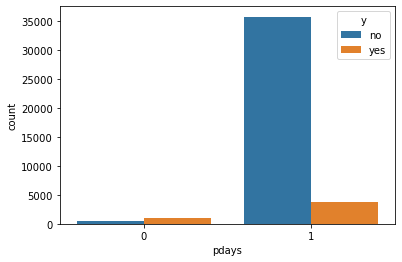

In [32]:
sns.countplot(x='pdays', data = df_numcp, hue = 'y')

In [131]:
df_numcp.y.value_counts()

no     36230
yes     4639
Name: y, dtype: int64

### Variables con outliers:

En el caso de los árboles de decisión sabemos que son robustos ante outliers, pero como queremos a futuro aplicar más métodos haremos igual el análisis de valores extremos:

Vimos en el AfterClass anterior que las variables _campaign_, _previous_, _duration_ tenían presencia de valores extremos:


campaign Número de contactos para el ofrecimiento de la actual campaña. 


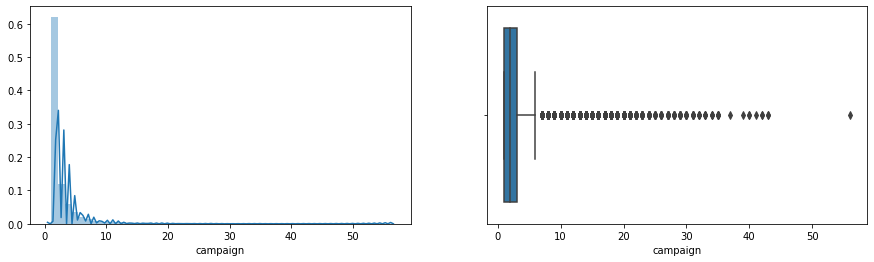

previous Número de contactos para el ofrecimiento antes de la actual campaña. 


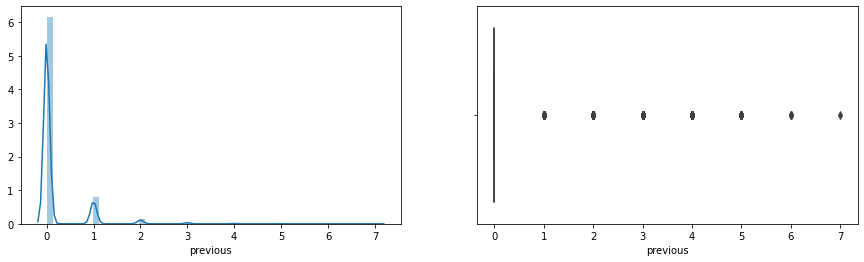

duration Duración de la llamada o del contacto.


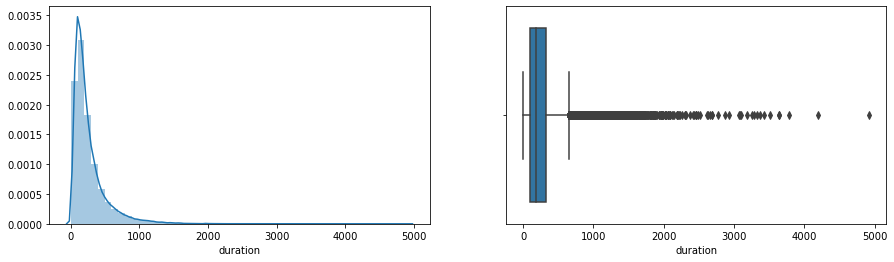

In [133]:
for col in ['campaign', 'previous', 'duration']:
    print(col, d_desc[col])
    fig, ax = plt.subplots(1,2, figsize=(15, 4))
    ax[0] = sns.distplot(df_num[col], ax=ax[0])
    ax[1] = sns.boxplot(df_num[col], ax=ax[1])
    plt.show()

Antes de elegir si hacemos algún tipo de transformación debemos analizar la relación de los valores outliers con el target. Esto lo vimos también en el análisis bivariado del AfterClass pasado:

campaign Número de contactos para el ofrecimiento de la actual campaña. 


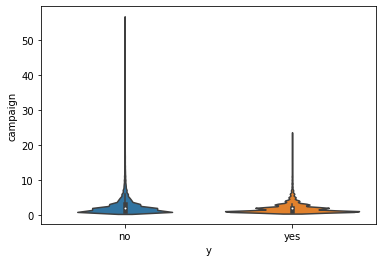

previous Número de contactos para el ofrecimiento antes de la actual campaña. 


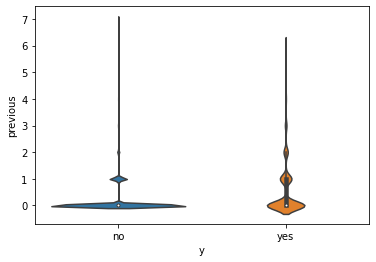

duration Duración de la llamada o del contacto.


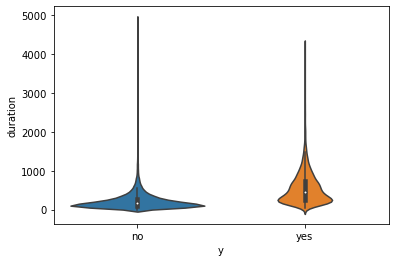

In [134]:
for col in ['campaign', 'previous', 'duration']:
    print(col, d_desc[col])
    sns.violinplot(x='y', y=col, data=df_num)
    plt.show()

Tomamos la decisión de no hacer cambios a la variable campaign.

Tomamos la dicisión de procesar los valores outliers de duration reemplazandolo por el valor tope del criterio intercuartil:

In [35]:
Q1 = df['duration'].quantile(0.25)
Q3 = df['duration'].quantile(0.75)

IQR = Q3-Q1

tope = Q3+1.5*IQR
tope


644.5

In [136]:
# creamos una nueva columas con valores reemplazados:
df_num['duration_proc'] = df_num['duration']
df_num.loc[df_num['duration_proc']>tope, 'duration_proc'] = tope

Tomamos la desición de procesar los valores de la variable previous cambiando todo valor mayor o igual a 2 por 2:

In [137]:
# hacemos el reemplazo:
df_num['previous_proc'] = df_num['previous']
df_num.loc[df_num['previous_proc']>=2, 'previous_proc'] = 2

Tarea: Hacer el mismo procesamiento con el comando replace y/o apply y/o map

### Target numérico:

In [138]:
df_num.y.unique()

array(['no', 'yes'], dtype=object)

In [139]:
## Convertimos la variable target a valores enteros
df_num['y'] = df_num.y.map({'no':0, 'yes':1})

## Inputs del modelo:

In [140]:
df_num.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,duration_proc,previous_proc
0,56,261,1,999,0,1.100,93.994,-36.400,4.857,5191.000,0,261.000,0
1,57,149,1,999,0,1.100,93.994,-36.400,4.857,5191.000,0,149.000,0
2,37,226,1,999,0,1.100,93.994,-36.400,4.857,5191.000,0,226.000,0
3,40,151,1,999,0,1.100,93.994,-36.400,4.857,5191.000,0,151.000,0
4,56,307,1,999,0,1.100,93.994,-36.400,4.857,5191.000,0,307.000,0


In [141]:
## nos quedamos con las columnas sin procesar outliers:
columnas1 = df_num.columns.tolist()[:-2]
columnas1

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

Pero también podríamos hacer pruebas con otras combinaciones de columnas:

In [42]:
# el target y todas las numericas procesando outliers
columnas2 = df_num.drop(['duration', 'previous'], axis = 1).columns.tolist()

# el target y todas las numeéricas salvo pdays sin procesar outliers
columnas3 = df_num.drop('pdays', axis = 1).columns.tolist()[:-2]

# el target y todas las numericas salvo pdays procesando outliers
columnas4 = df_num.drop(['duration', 'previous', 'pdays'], axis = 1).columns.tolist()

In [43]:
df_num[columnas1].head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,261,1,999,0,1.100,93.994,-36.400,4.857,5191.000,0
1,57,149,1,999,0,1.100,93.994,-36.400,4.857,5191.000,0
2,37,226,1,999,0,1.100,93.994,-36.400,4.857,5191.000,0
3,40,151,1,999,0,1.100,93.994,-36.400,4.857,5191.000,0
4,56,307,1,999,0,1.100,93.994,-36.400,4.857,5191.000,0


## Modelo de Árbol 


### Train & Test Split

In [142]:
# split del dataset
from sklearn.model_selection import train_test_split

In [143]:
# separamos las caracteristicas/features del target
X = df_num[columnas1].drop('y', axis=1)
y = df_num['y']

In [48]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=33,
                                                    stratify= y)


print('Tamaño del set de entrenamiento:', X_train.shape)
print('Tamaño del set de testeo:', X_test.shape)

Tamaño del set de entrenamiento: (32695, 10)
Tamaño del set de testeo: (8174, 10)


In [49]:
# porcentaje de clase True en train
100*y_train.sum()/len(y_train)

11.350359382168527

In [50]:
# porcentaje de clase True en test
100*y_test.sum()/len(y_test)

11.353070712013702

### Árbol de Decisión:

Pros:
-------
* alta capacidad de explicar la decisión
* aceptan variables categóricas

Contras:
-----------
* necesitan data balanceada
* tienen a sobre ajuste

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

Tener en cuenta que tanto los árboles como los ensambles de árboles, no necesitan escalado de valores.

In [146]:
# modelos
from sklearn.tree import DecisionTreeClassifier

In [147]:
tree_model = DecisionTreeClassifier(random_state = 0, class_weight='balanced')

### Entrenamiento, predicción y evaluación:

In [148]:
# entrenamiento
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=0)

In [149]:
# si queremos podes ver los hiperparametros del arbol
tree_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

### Predicciones:

In [150]:
# predicciones
y_pred = tree_model.predict(X_test)
y_pred_train = tree_model.predict(X_train)

In [151]:
X_test.shape, y_test.shape

((8174, 4), (8174,))

In [152]:
y_pred.shape

(8174,)

Miramos las 10 primeras predicciones:

In [153]:
y_pred[:10]

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

Y lo comparamos con el valor real del target de las 10 primeras filas

In [154]:
y_test[:10].values

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

### Evaluación

In [155]:
# evaluacion 
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Evaluamos el modelo en el conjunto de testeo:

In [156]:
recall = recall_score(y_train, y_pred_train)
precision = precision_score(y_train, y_pred_train)
acc = accuracy_score(y_train, y_pred_train)
f1 = f1_score(y_train, y_pred_train)

print('METRICAS TRAIN:')
print('Recall: {:.4f}'.format(recall))
print('Precision: {:.4f}'.format(precision))
print('F1: {:.4f}'.format(f1))
print('Accuracy: {:.4f}'.format(acc))

METRICAS TRAIN:
Recall: 1.0000
Precision: 0.9973
F1: 0.9987
Accuracy: 0.9997


Evaluamos el modelo ya entrenado en el conjunto de testeo:

In [157]:
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('METRICAS TEST:')
print('Recall: {:.4f}'.format(recall))
print('Precision: {:.4f}'.format(precision))
print('F1: {:.4f}'.format(f1))
print('Accuracy: {:.4f}'.format(acc))

METRICAS TEST:
Recall: 0.4494
Precision: 0.4593
F1: 0.4542
Accuracy: 0.8774


In [158]:
confusion_matrix(y_test, y_pred)

array([[6755,  491],
       [ 511,  417]], dtype=int64)

In [159]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7246
           1       0.46      0.45      0.45       928

    accuracy                           0.88      8174
   macro avg       0.69      0.69      0.69      8174
weighted avg       0.88      0.88      0.88      8174



###  Probabilidades

In [160]:
proba = tree_model.predict_proba(X_test)

proba

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

### Feature importance

In [161]:
tree_model.feature_importances_

array([0.50219682, 0.17397467, 0.21452533, 0.10930318])

In [162]:
df_importancia = pd.DataFrame({'Variable': X_train.columns.values.tolist(),
                               'Importancia': tree_model.feature_importances_}).sort_values(by='Importancia', ascending=False)

df_importancia

,Variable,Importancia
0,duration,0.502
2,euribor3m,0.215
1,nr.employed,0.174
3,age,0.109


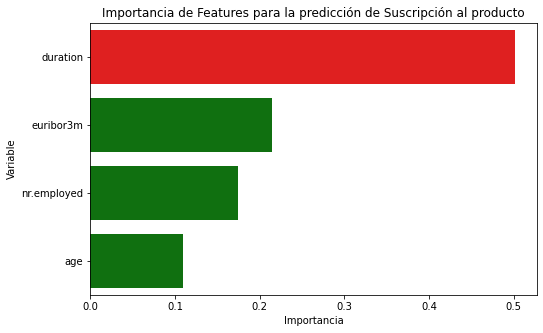

In [163]:
plt.figure(figsize=(8,5))

values = df_importancia.Importancia    

sns.barplot(y=df_importancia.Variable,
            x=values,
            palette = ['green' if (x < max(values)) else 'red' for x in values ]
           ).set(title='Importancia de Features para la predicción de Suscripción al producto')

plt.show()

## Comparativas variando campos:

In [164]:
# inicializo los dataframes en donde voy a guardar la información de las métricas:
metricas_train = pd.DataFrame({'metricas':['recall', 'precision', 'accuracy', 'f1']})
metricas_test = pd.DataFrame({'metricas':['recall', 'precision', 'accuracy', 'f1']})

columnas5 = df_importancia.Variable.tolist()[:4]+['y']

for i, comb in enumerate([columnas1, columnas2, columnas3, columnas4, columnas5]):
    
    # separamos el target 
    X = df_num[comb].drop('y', axis=1)
    y = df_num['y']

    # dividimos en train y test 
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, # nos quedata dividido en 80% train y 20% test
                                                    random_state=33,# es la semilla para que cada vez que lo corramos de lo mismo
                                                    stratify = y)   # se separa "parejo" respecto a la variable y
                                                    
    # modelo
    tree_model = DecisionTreeClassifier(random_state = 42,
                                        class_weight='balanced') # para lidear con data desbalanceada
    # entrenamos y predecimos
    print('Entrenando modelo nro: ', i)
    tree_model.fit(X_train, y_train)
    
    y_pred = tree_model.predict(X_test)
    y_pred_train = tree_model.predict(X_train)
    
    # calculamos y guardamos los valores recall, precision, accuracy y f1
    metricas_train['mod'+str(i)] = [recall_score(y_train, y_pred_train), 
                                    precision_score(y_train, y_pred_train),
                                    accuracy_score(y_train, y_pred_train),
                                    f1_score(y_train, y_pred_train)]
    
    metricas_test['mod'+str(i)] = [recall_score(y_test, y_pred),
                                   precision_score(y_test, y_pred),
                                   accuracy_score(y_test, y_pred),
                                   f1_score(y_test, y_pred)]
    
    
    

Entrenando modelo nro:  0
Entrenando modelo nro:  1
Entrenando modelo nro:  2
Entrenando modelo nro:  3
Entrenando modelo nro:  4


In [165]:
metricas_train.set_index('metricas').T

metricas,recall,precision,accuracy,f1
mod0,1.000,0.999,1.000,1.000
mod1,1.000,0.950,0.994,0.975
mod2,1.000,0.999,1.000,1.000
mod3,1.000,0.949,0.994,0.974
mod4,1.000,0.997,1.000,0.999


In [167]:
metricas_test.set_index('metricas').T.sort_values(by='f1', ascending = False)

metricas,recall,precision,accuracy,f1
mod1,0.497,0.493,0.885,0.495
mod0,0.488,0.495,0.885,0.491
mod2,0.445,0.475,0.881,0.460
mod4,0.445,0.464,0.879,0.454
mod3,0.446,0.462,0.878,0.454


Como vemos el árbol generó un overfitting. Las técnicas para evitar el sobre entrenamiento las veremos en otra sección, pero para anticiparnos unas ideas pueden ser bajar la profundidad en el arbol, trabajar con menos variables, pre-pruning, post-pruning, o considerar otros modelos.

## Regresión Logistica

In [169]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X1 = scaler.transform(X)
X1 = pd.DataFrame(data = X1, columns= X.columns)

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X1, y,
                                                    test_size=0.2,
                                                    random_state=33,
                                                    stratify= y)



print('Tamaño del set de entrenamiento:', X_train.shape)
print('Tamaño del set de testeo:', X_test.shape)

Tamaño del set de entrenamiento: (32695, 4)
Tamaño del set de testeo: (8174, 4)


In [172]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [173]:
y_pred = tree_model.predict(X_test)
y_pred_train = tree_model.predict(X_train)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      7246
           1       0.00      0.00      0.00       928

    accuracy                           0.89      8174
   macro avg       0.44      0.50      0.47      8174
weighted avg       0.79      0.89      0.83      8174



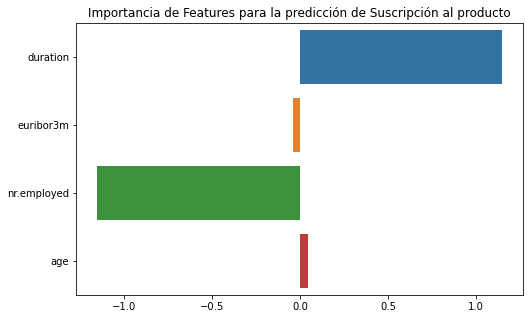

In [174]:
plt.figure(figsize=(8,5))

values = pd.Series(clf.coef_.flat)  

sns.barplot(y=X1.columns,
            x=values,
           ).set(title='Importancia de Features para la predicción de Suscripción al producto')

plt.show()

In [ ]:
df.loc[((df.colesterol<30) & (df.ritmo>90)) | (df.hijos>10),'y'] = 0
df.loc[df.colesterol>30,'y'] = 1
df.loc[df.colesterol>90,'y'] = 2